<a href="https://colab.research.google.com/github/SIDIBEMoussa/Hackhatons/blob/main/Hakhathon2021_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [ ]:
train_set=pd.read_csv("Train_v2.csv")
test_set=pd.read_csv("Test_v2.csv")

In [ ]:
train_set.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
df1=train_set[["country","year","uniqueid","household_size","age_of_respondent"]]
t1=test_set[["country","year","uniqueid","household_size","age_of_respondent"]]

In [ ]:
df2=train_set.drop(["country","year","uniqueid","household_size","age_of_respondent"],axis=1)
t2=test_set.drop(["country","year","uniqueid","household_size","age_of_respondent"],axis=1)

In [ ]:
df2.head()

,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed
1,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
df2["cellphone_access"]=[str(a) for a in df2.cellphone_access]
df2["gender_of_respondent"]=[str(a) for a in df2.gender_of_respondent]
df2["relationship_with_head"]=[str(a) for a in df2.relationship_with_head]
df2["marital_status"]=[str(a) for a in df2.marital_status]
df2["education_level"]=[str(a) for a in df2.education_level]
df2["job_type"]=[str(a) for a in df2.job_type]


t2["cellphone_access"]=[str(a) for a in t2.cellphone_access]
t2["gender_of_respondent"]=[str(a) for a in t2.gender_of_respondent]
t2["relationship_with_head"]=[str(a) for a in t2.relationship_with_head]
t2["marital_status"]=[str(a) for a in t2.marital_status]
t2["education_level"]=[str(a) for a in t2.education_level]
t2["job_type"]=[str(a) for a in t2.job_type]

In [ ]:
df2.head()

,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Yes,Rural,Yes,Female,Spouse,Married/Living together,Secondary education,Self employed
1,No,Rural,No,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Yes,Urban,Yes,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,No,Urban,No,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
lb=LabelEncoder()

In [ ]:
for col in df2.columns:
  df2[col]=lb.fit_transform(df2[col])

In [ ]:
for col in t2.columns:
  t2[col]=lb.fit_transform(t2[col])

In [ ]:
df2.head()

,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,1,0,1,0,5,2,3,8
1,0,0,0,0,1,4,0,4
2,1,2,1,1,3,3,5,8
3,0,0,1,0,1,2,2,3
4,0,2,0,1,0,3,2,5


In [ ]:
t2.head()

,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,1,1,1,1,2,3,2
1,1,1,1,1,2,5,3
2,0,0,0,4,2,0,8
3,0,0,0,1,2,2,8
4,1,0,1,0,3,3,8


In [ ]:
import seaborn as  sns

In [ ]:
df3=(df1.join(df2))
df3.head()

,country,year,uniqueid,household_size,age_of_respondent,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,3.0,24.0,1,0,1,0,5,2,3,8
1,Kenya,2018,uniqueid_2,5.0,70.0,0,0,0,0,1,4,0,4
2,Kenya,2018,uniqueid_3,5.0,26.0,1,2,1,1,3,3,5,8
3,Kenya,2018,uniqueid_4,5.0,34.0,0,0,1,0,1,2,2,3
4,Kenya,2018,uniqueid_5,8.0,26.0,0,2,0,1,0,3,2,5


In [ ]:
t3=(t1.join(t2))
t3.head()

,country,year,uniqueid,household_size,age_of_respondent,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,3,30,1,1,1,1,2,3,2
1,Kenya,2018,uniqueid_6060,7,51,1,1,1,1,2,5,3
2,Kenya,2018,uniqueid_6065,3,77,0,0,0,4,2,0,8
3,Kenya,2018,uniqueid_6072,6,39,0,0,0,1,2,2,8
4,Kenya,2018,uniqueid_6073,3,16,1,0,1,0,3,3,8


In [ ]:
(df3.iloc[:,3:]).head()

,household_size,age_of_respondent,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,3.0,24.0,1,0,1,0,5,2,3,8
1,5.0,70.0,0,0,0,0,1,4,0,4
2,5.0,26.0,1,2,1,1,3,3,5,8
3,5.0,34.0,0,0,1,0,1,2,2,3
4,8.0,26.0,0,2,0,1,0,3,2,5


In [ ]:
df3.iloc[:,3:].describe(include="all")

,household_size,age_of_respondent,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,13313.000000,13313.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000,13314.000000
mean,4.270938,39.402238,0.177708,0.536954,0.811251,0.413550,2.044690,2.364954,2.011116,3.992038
std,2.167244,16.700795,0.382281,0.886325,0.391515,0.492641,1.894268,0.902840,1.232109,2.606482
min,1.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,27.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,1.000000
50%,4.000000,35.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,5.000000
75%,6.000000,50.000000,0.000000,2.000000,1.000000,1.000000,5.000000,3.000000,3.000000,6.000000
max,21.000000,99.000000,1.000000,2.000000,2.000000,2.000000,6.000000,5.000000,6.000000,9.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
df3=df3.dropna()
df4=(df3.iloc[:,3:]).drop(columns=["bank_account"])
x_train,x_test,y_train,y_test=train_test_split(df4,df3.bank_account,train_size=0.8)

t4=t3.iloc[:,3:]

In [ ]:
t4.head()

,household_size,age_of_respondent,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,3,30,1,1,1,1,2,3,2
1,7,51,1,1,1,1,2,5,3
2,3,77,0,0,0,4,2,0,8
3,6,39,0,0,0,1,2,2,8
4,3,16,1,0,1,0,3,3,8


In [ ]:
df4.shape,t4.shape

((13313, 9), (10086, 9))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,StackingClassifier

Classifiers=[KNeighborsClassifier,SVC,LogisticRegression,RidgeClassifier,RandomForestClassifier,RandomForestClassifier,MLPClassifier,MLPClassifier,
             LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis,XGBClassifier,BaggingClassifier,RandomForestClassifier]

In [ ]:
col=["Name","Accuracy"]
df=pd.DataFrame(columns=col)
for classifier in Classifiers:
    Name=classifier.__name__
    model=classifier().fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    print("***Result***")
    print("="*40)
    print("{} \n Accuracy:{:.4%}".format(Name,acc))
    print("="*40)
    df1=pd.DataFrame([[Name,acc]],columns=col)
    df=df.append(df1)

***Result***
KNeighborsClassifier 
 Accuracy:83.4022%
***Result***
SVC 
 Accuracy:81.9001%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


***Result***
LogisticRegression 
 Accuracy:84.5663%
***Result***
RidgeClassifier 
 Accuracy:83.4773%
***Result***
RandomForestClassifier 
 Accuracy:83.1018%
***Result***
RandomForestClassifier 
 Accuracy:83.2144%
***Result***
MLPClassifier 
 Accuracy:84.6038%
***Result***
MLPClassifier 
 Accuracy:84.2283%
***Result***
LinearDiscriminantAnalysis 
 Accuracy:84.7165%
***Result***
QuadraticDiscriminantAnalysis 
 Accuracy:81.5621%
***Result***
XGBClassifier 
 Accuracy:85.7304%
***Result***
BaggingClassifier 
 Accuracy:81.5997%
***Result***
RandomForestClassifier 
 Accuracy:83.1018%


In [ ]:
df.Accuracy

0    0.834022
0    0.819001
0    0.845663
0    0.832144
0    0.826887
0    0.847540
0    0.846789
0    0.847165
0    0.815621
0    0.857304
0    0.817124
0    0.832520
Name: Accuracy, dtype: float64

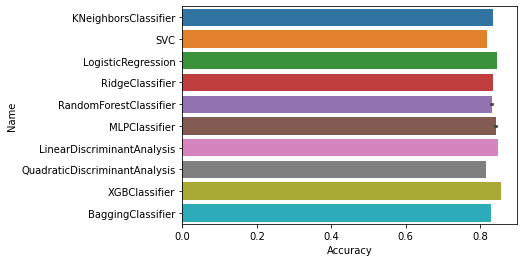

In [ ]:
import seaborn as sns
sns.barplot(x="Accuracy",y="Name",data=df)
pl.show()

In [ ]:
index=list(df.Accuracy).index(max(df.Accuracy))
index
print("Maximum de précision des classiers est :{:.4%}".format(list(df.Accuracy)[index]))
print(index)

Maximum de précision des classiers est :85.7304%
9


In [ ]:
clf_op=Classifiers[index]()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
clf_op_opti=GridSearchCV(clf_op,parameters,cv=10)

In [ ]:
clf_op.__class__.__name__

'XGBClassifier'

In [ ]:
clf_op_opti.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verb

In [ ]:
y_pred=clf_op_opti.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print("Accuracy:{:.4%} \n Meilleur hyperparamètre:{}".format(acc,clf_op_opti.best_params_))

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_search=RandomizedSearchCV(clf_op,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x_train,y_train)
timer(start_time) # timing ends here for "start_time" variable


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   16.5s finished



 Time taken: 0 hours 0 minutes and 17.39 seconds.


In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=12,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.1,
 'learning_rate': 0.05,
 'max_depth': 12,
 'min_child_weight': 5}

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(random_search,x_train,y_train,cv=10)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    8.5s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   11.6s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   11.4s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    8.8s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    8.3s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    9.3s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   17.0s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    8.2s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    9.7s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   14.0s finished


In [ ]:
score.mean()

0.8348641116968715

In [ ]:
y_pred=random_search.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc

0.8573037927149831

# Submission

In [ ]:
bank_account=clf_op_opti.predict(t4)

In [ ]:
bank_account[:5]

In [ ]:
Submission=pd.DataFrame({"uniqueid":t1.uniqueid,"bank_account":bank_account})

In [ ]:
import numpy as np

In [ ]:
t4.shape

In [ ]:
coun=np.count_nonzero(Submission.bank_account==1)
taux=coun/(t4.shape)[0]
taux

In [ ]:
print("Le taux de reussite de demande compte bancaire est de :{:.2%}".format(taux))

In [ ]:
Submission.to_csv("SubmissionFile.csv")